In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
!pip install pyttsx3
import pyttsx3
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import csv
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/DISEASE PREDICTION DATASET/full dataset.csv')
dataset.describe()



,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,...,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,0.137875,0.159847,0.021971,0.045152,0.021971,0.162266,0.139085,0.045152,0.045152,0.021971,...,0.021971,0.021971,0.021971,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181
std,0.344804,0.366501,0.146605,0.207659,0.146605,0.368732,0.346070,0.207659,0.207659,0.146605,...,0.146605,0.146605,0.146605,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


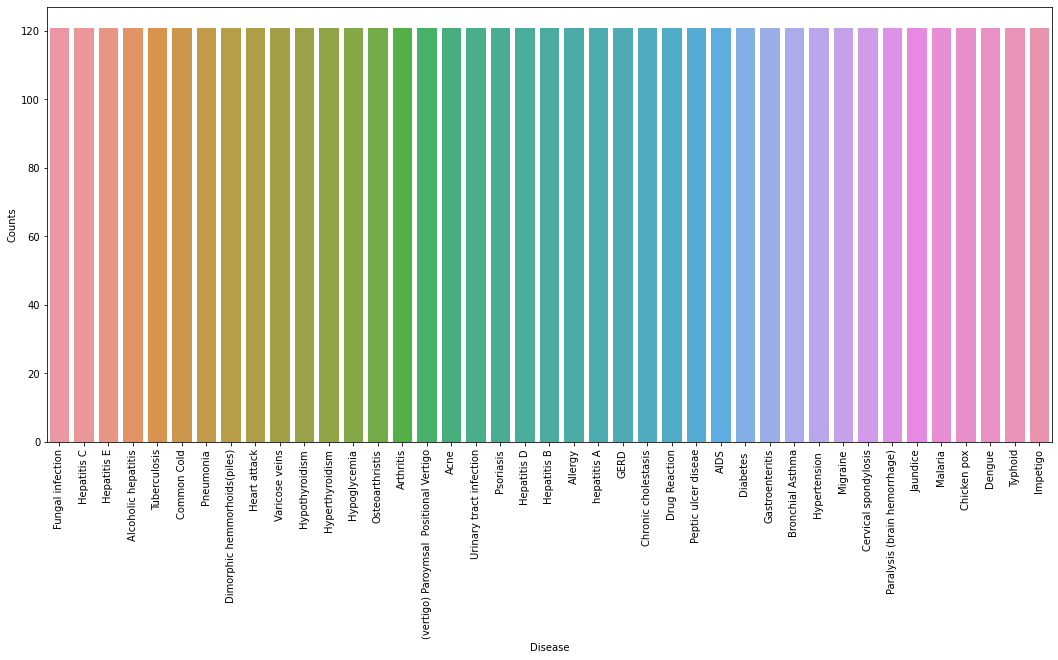

In [ ]:
# Reading the train.csv by removing the
# last column since it's an empty column
import seaborn as sns

# Checking whether the dataset is balanced or not
disease_counts = dataset["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
dataset['prognosis']= label_encoder.fit_transform(dataset['prognosis'])

In [ ]:
#Univariate Selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

X=dataset.drop('prognosis', axis=1)
y=dataset.prognosis
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

                Specs     Score
14            fatigue  0.575154
11           vomiting  0.562870
25         high_fever  0.513231
35   loss_of_appetite  0.508742
34             nausea  0.502184
31           headache  0.483926
39     abdominal_pain  0.449662
43  yellowing_of_eyes  0.429277
32     yellowish_skin  0.425342
5              chills  0.408434
1           skin_rash  0.403882
56         chest_pain  0.393111
48            malaise  0.384862
28           sweating  0.381034
0             itching  0.366461


[0.01549118 0.00875634 0.00930324 0.00678516 0.00495878 0.0109507
 0.01349043 0.01031295 0.00527751 0.00508036 0.00824292 0.01202538
 0.00533131 0.00768142 0.01147387 0.00113442 0.00073586 0.00046069
 0.0012402  0.01095403 0.00288633 0.00354204 0.00593503 0.00050266
 0.00958636 0.01197941 0.0064016  0.01031881 0.01117742 0.00391637
 0.00243265 0.00912087 0.00521874 0.01603234 0.01191698 0.00988204
 0.0100086  0.00850564 0.00360473 0.01038915 0.01565788 0.01591528
 0.00074632 0.01598359 0.00146704 0.         0.00660364 0.00584116
 0.00983435 0.00329925 0.00744985 0.00399791 0.00399097 0.00423598
 0.00407653 0.00203824 0.01441242 0.00367784 0.00890738 0.00632839
 0.00496824 0.00596893 0.00517001 0.00811687 0.00684831 0.00517736
 0.00425423 0.0053854  0.00414406 0.00029831 0.00119386 0.00599705
 0.00450387 0.00704586 0.00458917 0.0050355  0.00117141 0.0090416
 0.00921675 0.00719137 0.00991911 0.00427778 0.00362007 0.00896255
 0.00387161 0.00880211 0.0146539  0.00310229 0.00474993 0.012426

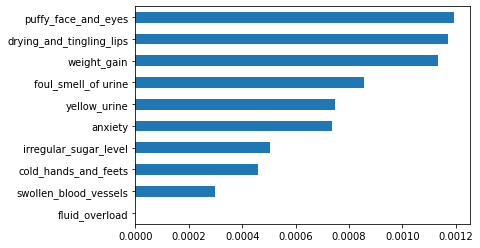

In [ ]:
#Feature Importance By smallest connection
import pandas as pd
import numpy as np

X=dataset.drop('prognosis', axis=1)
y=dataset.prognosis
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nsmallest(10).plot(kind='barh')
plt.show()

[1.70850360e-02 5.55917805e-03 8.13581047e-03 5.25034124e-03
 6.55658688e-03 1.03232663e-02 1.13147750e-02 1.14927862e-02
 4.58384164e-03 5.60076030e-03 7.59348982e-03 1.26394256e-02
 5.95723733e-03 7.48216836e-03 1.18842952e-02 2.83653356e-04
 1.22945077e-03 1.63154983e-03 1.91275471e-03 1.16979433e-02
 2.48241966e-03 5.43986933e-03 5.80041242e-03 2.12677313e-03
 8.20649741e-03 1.04962675e-02 5.36251998e-03 9.46423626e-03
 1.10760441e-02 6.67952873e-03 3.30901868e-03 8.38974190e-03
 8.26139679e-03 1.61307906e-02 8.41327803e-03 9.31914363e-03
 1.08732779e-02 8.35114308e-03 3.04614600e-03 9.57805155e-03
 1.48462778e-02 1.32713627e-02 4.12240463e-05 1.39835196e-02
 2.94794557e-03 0.00000000e+00 6.12554421e-03 6.16805249e-03
 7.99651186e-03 3.97679458e-03 9.37530244e-03 5.01949406e-03
 1.99835238e-03 3.72470084e-03 4.01798454e-03 4.75593069e-03
 1.42788668e-02 3.42551412e-03 1.01212044e-02 6.58463171e-03
 6.49508791e-03 5.90341186e-03 4.70422908e-03 8.86451554e-03
 6.55594118e-03 4.444550

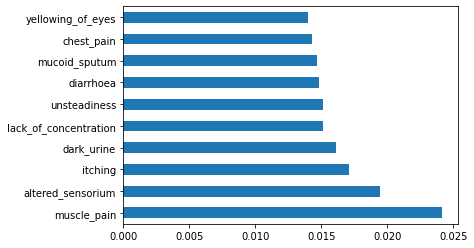

In [ ]:
#Feature Importance By largest connection
import pandas as pd
import numpy as np

X=dataset.drop('prognosis', axis=1)
y=dataset.prognosis
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

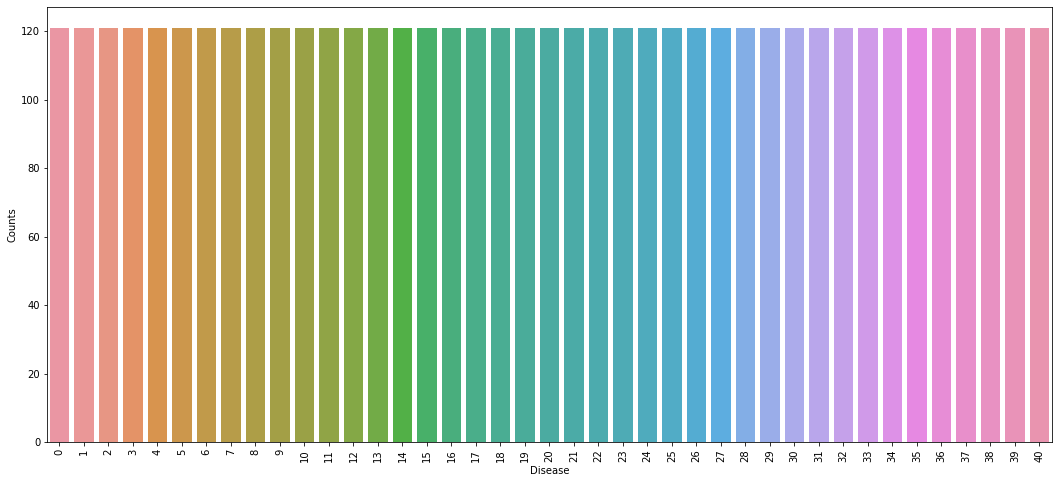

In [ ]:
import numpy as np
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='kendall', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out
 

In [ ]:
#Accuracy scores with 10 best features
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


X=dataset.drop('prognosis',axis=1)
X=trimm_correlated(X,0.45)
y=dataset.prognosis
print(X.columns,len(X.columns))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'chills', 'joint_pain', 'stomach_pain', 'acidity', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'fatigue', 'weight_gain', 'anxiety',
       'weight_loss', 'cough', 'sunken_eyes', 'headache', 'yellowish_skin',
       'pain_behind_the_eyes', 'constipation', 'diarrhoea',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'cramps', 'spinning_movements', 'weakness_of_one_body_side',
       'family_history', 'pus_filled_pimples', 'skin_peeling', 'blister'],
      dtype='object') 32


In [ ]:
print(len(X.columns))

32


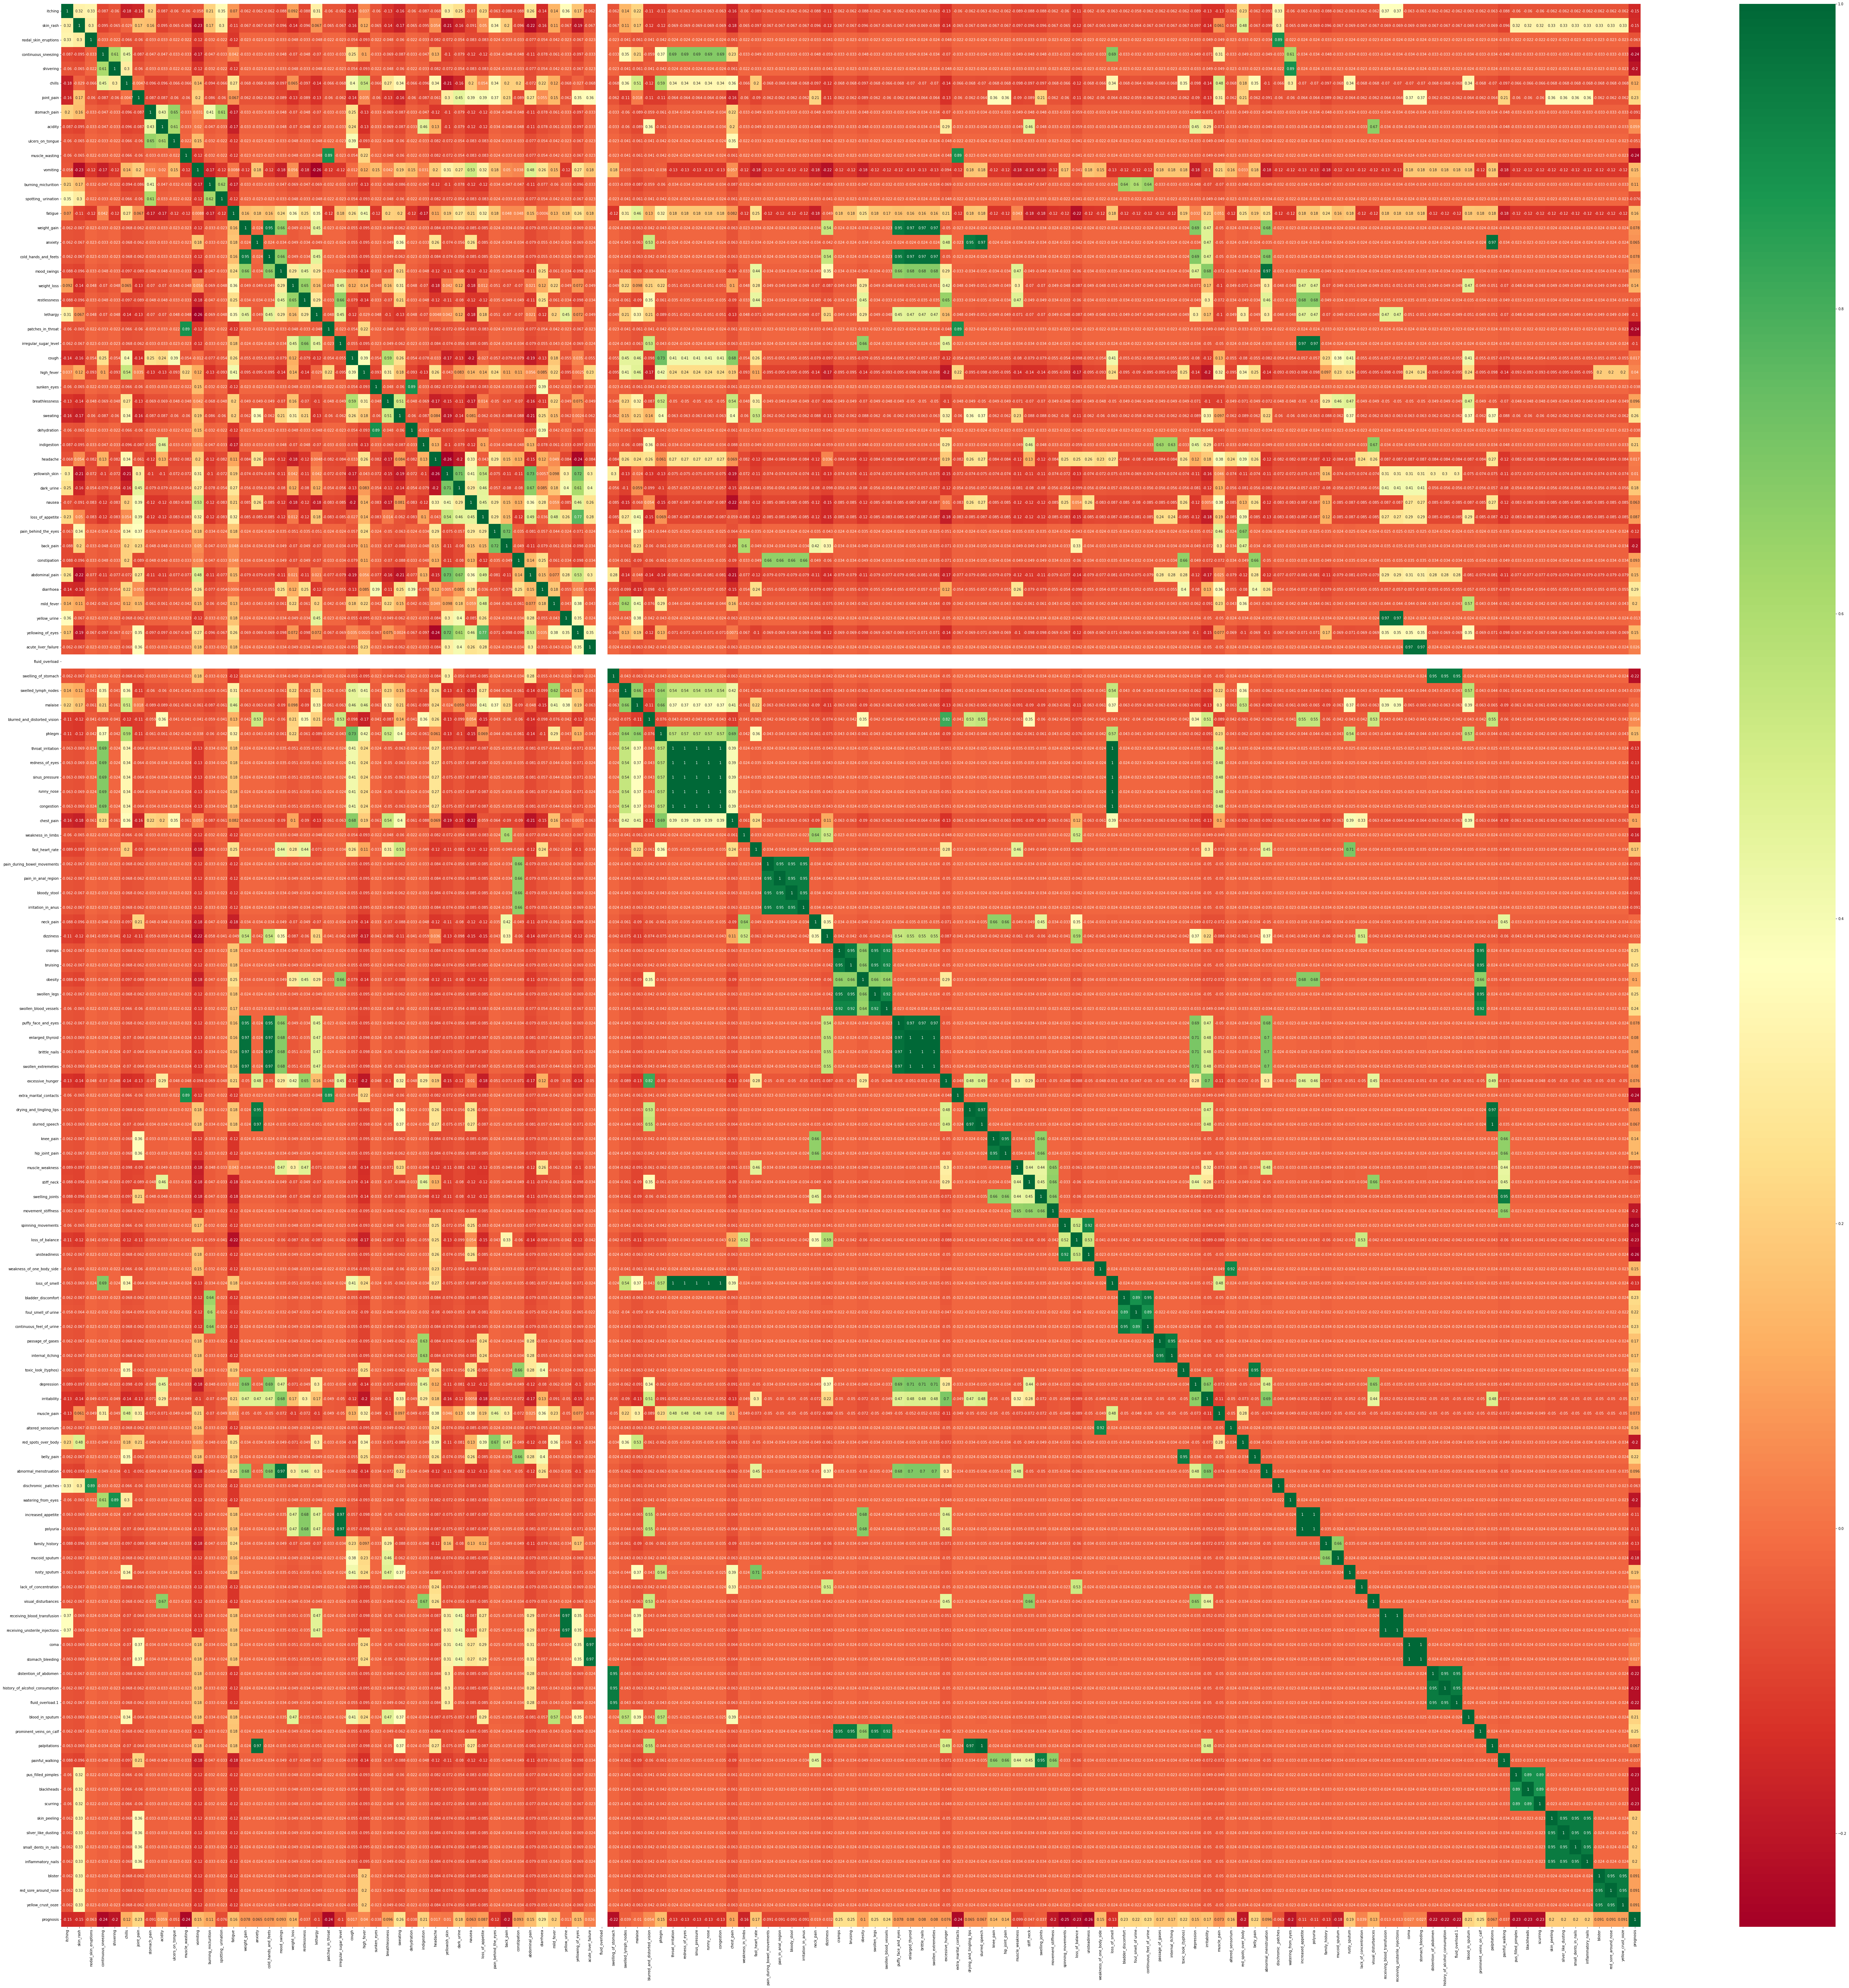

In [ ]:
#Correlation Matrix with Heatmap
import pandas as pd
import numpy as np
import seaborn as sns

#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(100,100))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,roc_auc_score
from sklearn.metrics import accuracy_score
def all_metrices(y_test,y_pred):
  acc=accuracy_score(y_test, y_pred)
  #auc=roc_auc_score(y_test,y_pred)
  precision=precision_score(y_test, y_pred,average='micro')
  recall=recall_score(y_test, y_pred,average='micro')
  f1=f1_score(y_test, y_pred,average='micro')
  mcc=matthews_corrcoef(y_test,y_pred)
  kappa=cohen_kappa_score(y_test,y_pred)

  print('Accuracy: %.2f' % (acc*100))
  #print('Roc_Auc Score: %.2f' % (auc*100))
  print('Precision: %.2f' % (precision*100))
  print('recall: %.2f' % (recall*100))
  print('fl score: %.2f' % (f1*100))
  print('Mcc Score: %.2f' % (mcc))
  print('Kappa score: %.2f' % (kappa))
  print('\n')
  



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train):
    if train:
        pred = clf.predict(X_train)
        
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        
        all_metrices(y_train,pred)
    elif train==False:
        pred = clf.predict(X_test)
        
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        
        all_metrices(y_test,pred)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy: 92.57
Precision: 92.57
recall: 92.57
fl score: 92.57
Mcc Score: 0.93
Kappa score: 0.92


Test Result:
Accuracy: 90.84
Precision: 90.84
recall: 90.84
fl score: 90.84
Mcc Score: 0.91
Kappa score: 0.91




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Train Result:
Accuracy: 92.49
Precision: 92.49
recall: 92.49
fl score: 92.49
Mcc Score: 0.92
Kappa score: 0.92


Test Result:
Accuracy: 91.14
Precision: 91.14
recall: 91.14
fl score: 91.14
Mcc Score: 0.91
Kappa score: 0.91




In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Train Result:
Accuracy: 91.99
Precision: 91.99
recall: 91.99
fl score: 91.99
Mcc Score: 0.92
Kappa score: 0.92


Test Result:
Accuracy: 88.32
Precision: 88.32
recall: 88.32
fl score: 88.32
Mcc Score: 0.88
Kappa score: 0.88




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Accuracy: 92.57
Precision: 92.57
recall: 92.57
fl score: 92.57
Mcc Score: 0.93
Kappa score: 0.92


Test Result:
Accuracy: 91.44
Precision: 91.44
recall: 91.44
fl score: 91.44
Mcc Score: 0.91
Kappa score: 0.91




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy: 92.57
Precision: 92.57
recall: 92.57
fl score: 92.57
Mcc Score: 0.93
Kappa score: 0.92


Test Result:
Accuracy: 90.84
Precision: 90.84
recall: 90.84
fl score: 90.84
Mcc Score: 0.91
Kappa score: 0.91




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3968, 32) (3968,)
(993, 32) (993,)


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
CNN_clf = MLPClassifier(solver='adam', alpha=1e-5, max_iter=500,
                    hidden_layer_sizes=(15, 7), random_state=10)
CNN_clf.fit(X_train, y_train)
print_score(CNN_clf, X_train, y_train, X_test, y_test, train=True)
print_score(CNN_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy: 92.57
Precision: 92.57
recall: 92.57
fl score: 92.57
Mcc Score: 0.93
Kappa score: 0.92


Test Result:
Accuracy: 91.44
Precision: 91.44
recall: 91.44
fl score: 91.44
Mcc Score: 0.91
Kappa score: 0.91




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

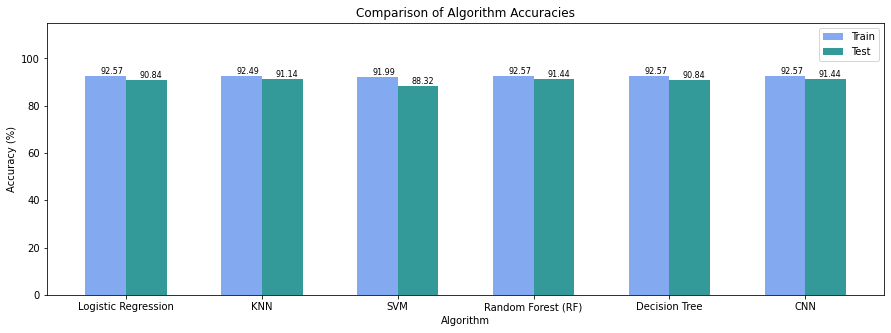

In [ ]:
# data to plot
n_groups = 6
algorithms = ('Logistic Regression', 'KNN','SVM', 'Random Forest (RF)','Decision Tree','CNN')
train_accuracy = (accuracy_score(y_train, lr_clf.predict(X_train))*100, 
                  accuracy_score(y_train, knn_clf.predict(X_train))*100, 
                  accuracy_score(y_train, svm_clf.predict(X_train))*100,
                  accuracy_score(y_train, rf_clf.predict(X_train))*100,
                  accuracy_score(y_train, tree_clf.predict(X_train))*100,
                  accuracy_score(y_train,CNN_clf.predict(X_train))*100
                  )
test_accuracy = (accuracy_score(y_test, lr_clf.predict(X_test))*100, 
                 accuracy_score(y_test, knn_clf.predict(X_test))*100, 
                 accuracy_score(y_test, svm_clf.predict(X_test))*100,
                 accuracy_score(y_test, rf_clf.predict(X_test))*100,
                 accuracy_score(y_test, tree_clf.predict(X_test))*100,
                 accuracy_score(y_test,CNN_clf.predict(X_test))*100
                 )

# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
plt.show()